# Notebook for hypothesis evaluation

* HYP 1 - Na základe osobných vlastností a záujmov je možné predikovať, či sa účastníci matchnú.
* HYP 2 - Na základe vlastností človeka je možné určiť jeho preferenciu na inteligenčnú úroveň jeho partnera (akú inteligenciu majú partneri, ktorých si vybrali).
* HYP 3 - Na základe vlastností človeka a jeho partnera je možné predikovať ako veľmi sa mu páči a ktoré atribúty majú najväčší vplyv.
* HYP 4 - Technickí inžinieri inklinujú k medikom.
* HYP 5 - Športovo založené ženy hľadajú výlučne športovo založených mužov.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import gaussian_kde
import statsmodels.api as sm


In [2]:
data = pd.read_csv('dataset.csv')
data = data.drop(columns=['Unnamed: 0'])

### HYPOTHESIS 2
Na základe vlastností človeka je možné určiť jeho preferenciu na inteligenčnú úroveň jeho partnera (akú inteligenciu majú partneri, ktorých si vybrali).

In [3]:
data_2 = data.copy()

In [4]:
df_personal = data_2[[
  'attr_me', 'sinc_me', 'fun_me', 'intel_me', 'amb_me', 'iid', 'pid', 'match', 'intel_me_partners', 'dec', 'dec_partner',
    'career','career_c'
]]

In [5]:
df_personal = df_personal[df_personal['match']==1]

df_personal.dropna(inplace=True)

df_personal_y = df_personal['intel_me_partners']
df_personal_x = df_personal.drop(columns=['intel_me_partners'])



### Is there realtionship between our features and predicting value ?


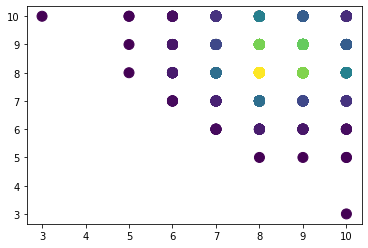

In [6]:
### toto len spustit v cykle na vsetky slptce a pridat k tomu popiskuy a mozn oto dat do riadky....
x = df_personal['intel_me']
y = df_personal['intel_me_partners']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()

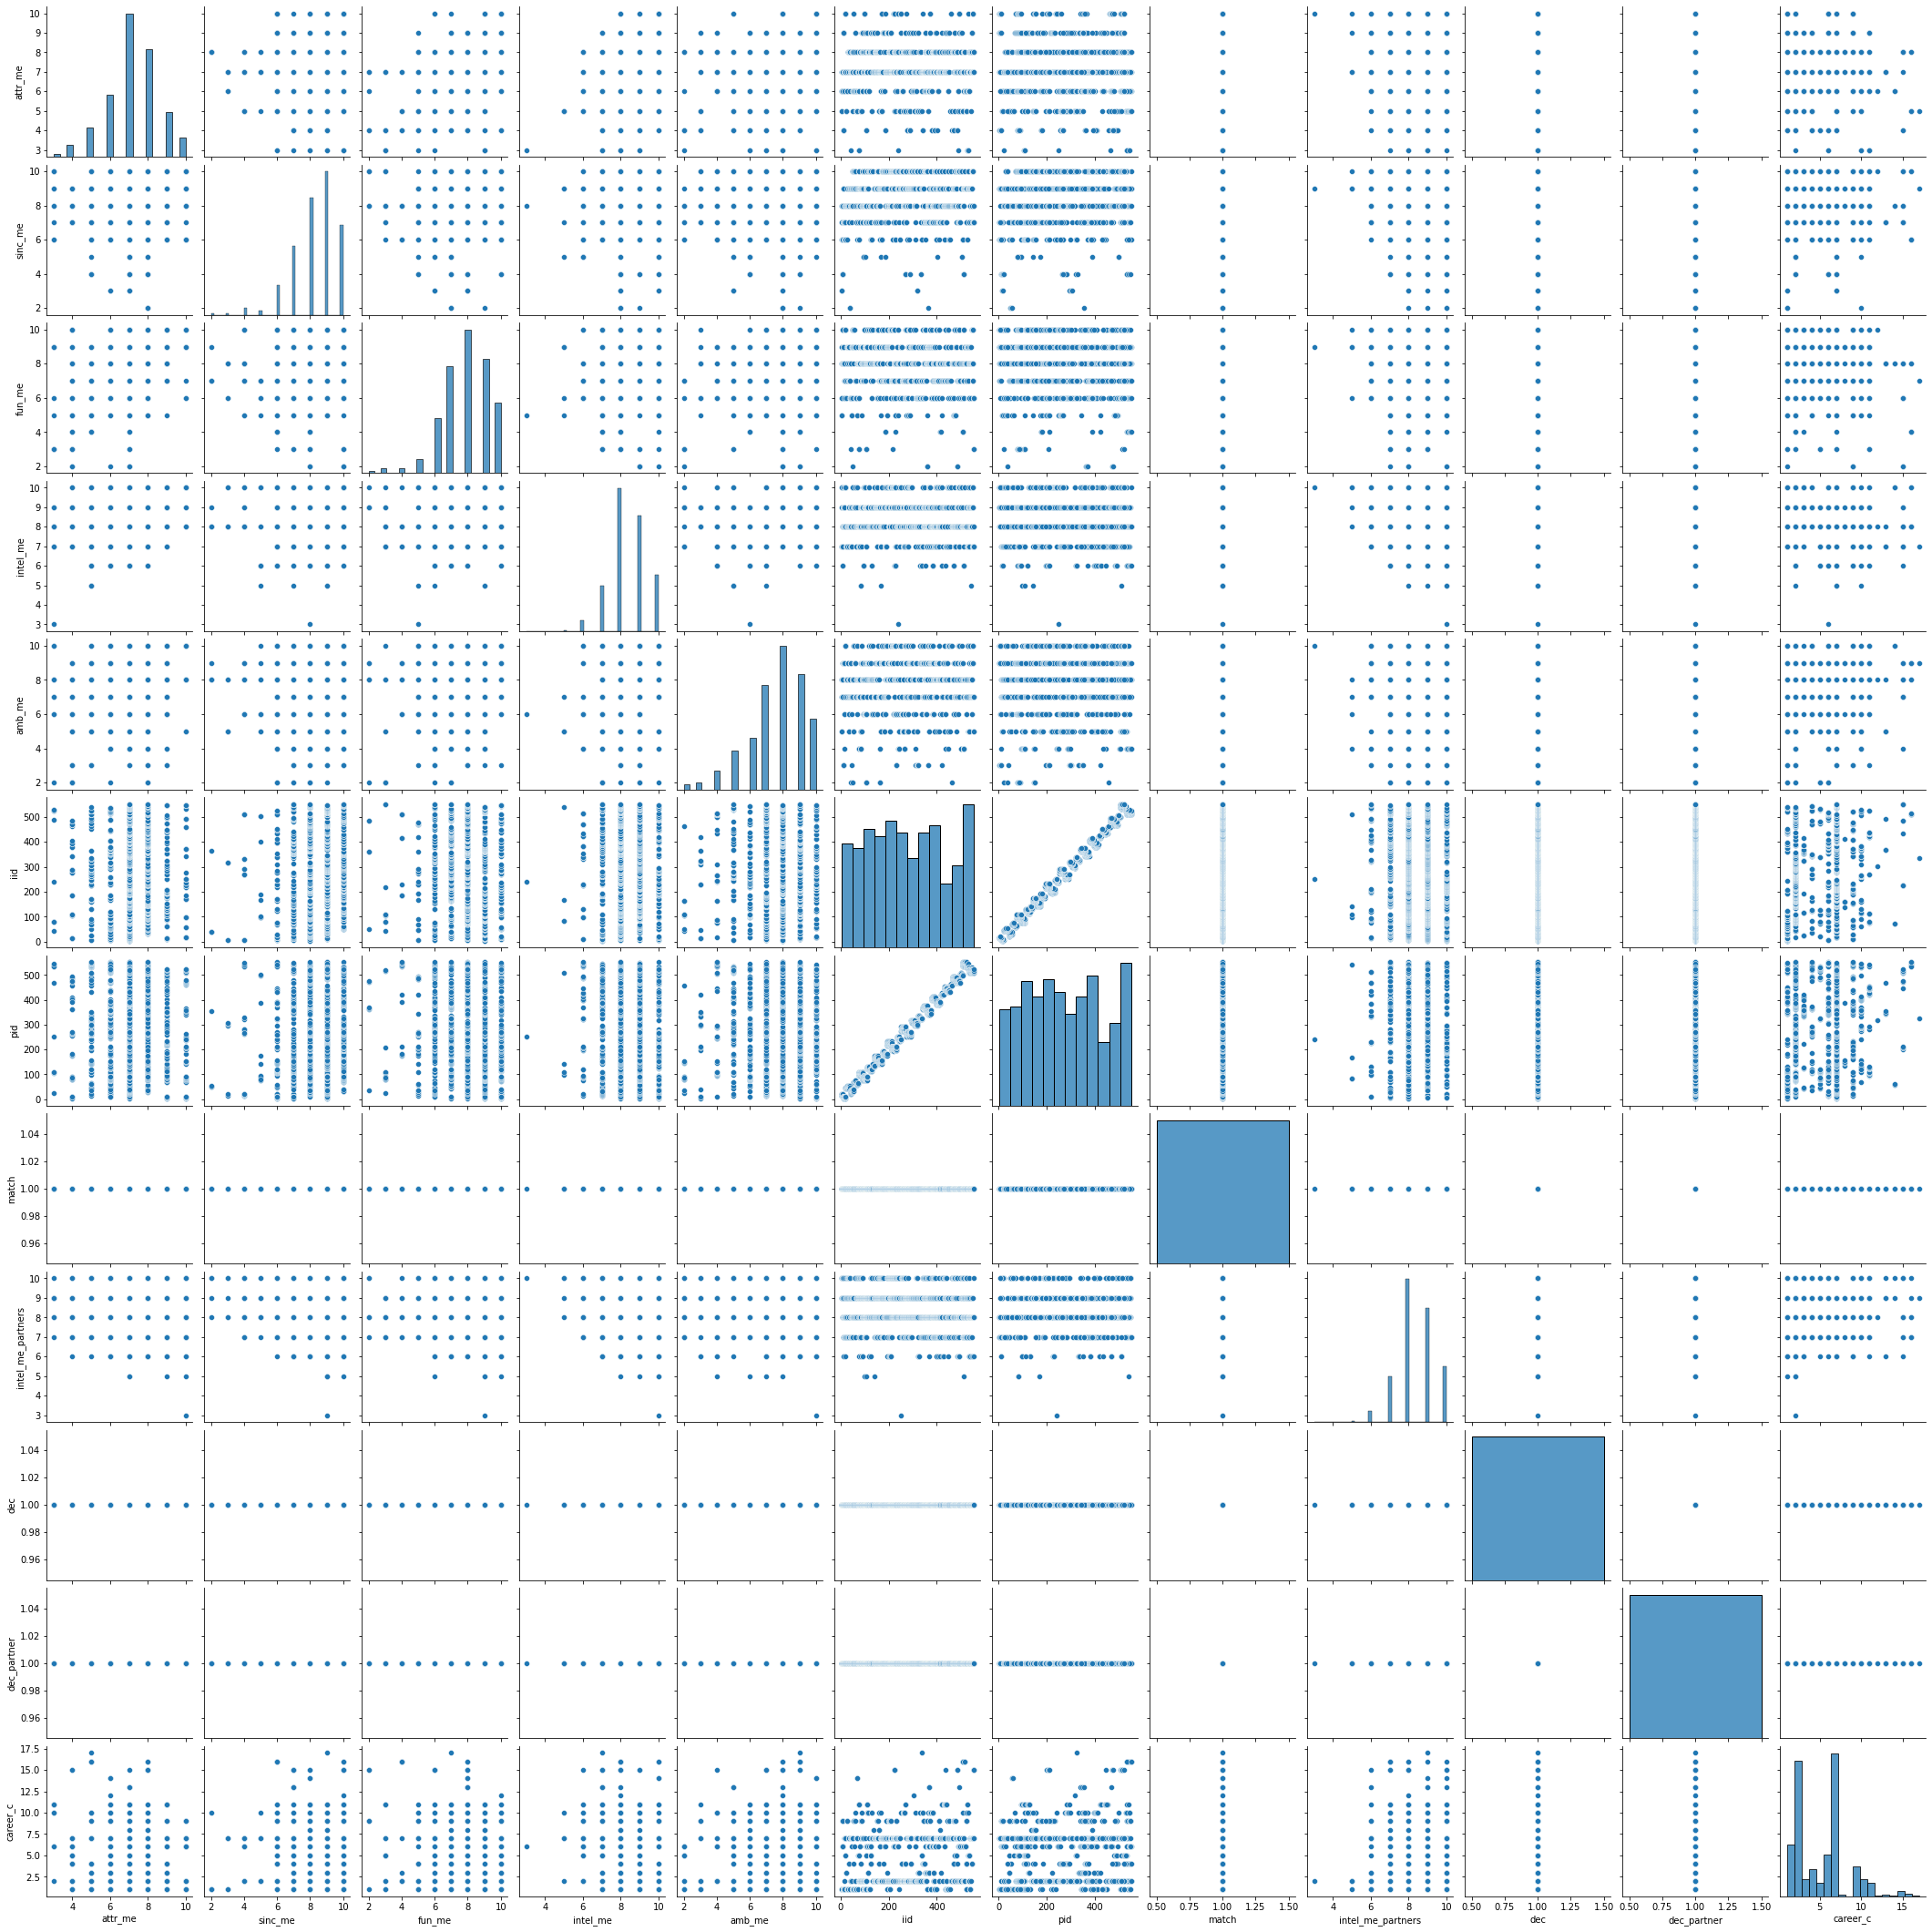

In [7]:
sns.pairplot(df_personal)

V tomto gulasi je pre nas podstatny stlpec intel_me_partners a zo 5 atributov. VIdime ziadna korelaciu napr v riadku s intel_me, kde sa centralizuju bodecky v pravom hornom rohu - a to chceme, to znamena ze intelinny ludia skor chcu inteligentych partnerov - takze tam moze byt zavislost na modelovanie... Idelane tento  fraf spravit tak ze bodky budu zohladnovat pocet interakcii a mozno zeby tu boli len tie grafy ktore maju byt....

# Poisson regression

In [8]:
df_personal.describe()

,attr_me,sinc_me,fun_me,intel_me,amb_me,iid,pid,match,intel_me_partners,dec,dec_partner,career_c
count,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.0,1315.000000,1315.0,1315.0,1315.000000
mean,7.200760,8.295817,7.879848,8.418251,7.622814,276.711027,276.634981,1.0,8.411407,1.0,1.0,5.118631
std,1.361852,1.393048,1.478670,1.015092,1.719021,158.973764,159.094476,0.0,1.015267,0.0,0.0,3.236198
min,3.000000,2.000000,2.000000,3.000000,2.000000,4.000000,1.000000,1.0,3.000000,1.0,1.0,1.000000
25%,6.000000,8.000000,7.000000,8.000000,7.000000,141.500000,141.500000,1.0,8.000000,1.0,1.0,2.000000
50%,7.000000,9.000000,8.000000,8.000000,8.000000,269.000000,269.000000,1.0,8.000000,1.0,1.0,6.000000
75%,8.000000,9.000000,9.000000,9.000000,9.000000,404.000000,404.000000,1.0,9.000000,1.0,1.0,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,552.000000,552.000000,1.0,10.000000,1.0,1.0,17.000000


### Fitting of the model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_personal_x, df_personal_y, test_size=0.20, random_state=42 )

In [10]:
clf = linear_model.PoissonRegressor()
clf.fit(X_train[['attr_me','intel_me','sinc_me','amb_me']], y_train)
clf.score(X_train[['attr_me','intel_me','sinc_me','amb_me']], y_train)
y_pred = clf.predict(X_test[['attr_me','intel_me','sinc_me','amb_me']])
print(mean_squared_error(y_test, y_pred))

gamma_model = sm.GLM(y_train,X_train[['attr_me','intel_me','sinc_me','amb_me']], family=sm.families.Poisson())

gamma_results = gamma_model.fit()

print(gamma_results.summary())

1.0329028926559216
                 Generalized Linear Model Regression Results                  
Dep. Variable:      intel_me_partners   No. Observations:                 1052
Model:                            GLM   Df Residuals:                     1048
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2395.1
Date:                Tue, 15 Mar 2022   Deviance:                       603.35
Time:                        23:04:05   Pearson chi2:                     644.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
attr_me        0.0304      0.009 

popis k vystupu

## Are there any error, outliers, specific points... - NO

In [11]:
df_pred = X_train[['attr_me','intel_me','sinc_me','amb_me']]

In [12]:
df_pred.describe()

,attr_me,intel_me,sinc_me,amb_me
count,1052.000000,1052.000000,1052.000000,1052.000000
mean,7.199620,8.405894,8.270913,7.623574
std,1.360752,1.012615,1.414143,1.684127
min,3.000000,3.000000,2.000000,2.000000
25%,6.000000,8.000000,8.000000,7.000000
50%,7.000000,8.000000,8.000000,8.000000
75%,8.000000,9.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

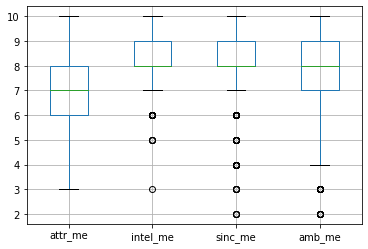

In [13]:
df_pred.boxplot()

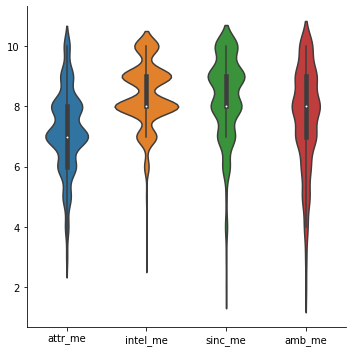

In [14]:
sns.catplot( kind="violin", data=df_pred)

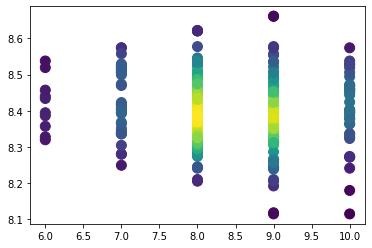

In [15]:
### toto len spustit v cykle na vsetky slptce a pridat k tomu popiskuy a mozn oto dat do riadky....
x = y_test
y = y_pred

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()

In [16]:
x

1312    8.0
7353    9.0
5497    8.0
1724    6.0
1281    6.0
       ... 
5935    7.0
2334    9.0
1183    9.0
2096    7.0
6264    9.0
Name: intel_me_partners, Length: 263, dtype: float64

In [17]:
len(y_pred)

263

## Hypothesis testing 

chi square ma byt 0 a je 640


Treba viacej zinterpretovat ??? nieco najst ako na a spytat sa ho

### Oplati saa byt intelinglym aby sme si nasli inteligentnejsieho partnera

# Medicky a inzinieri

### Model formalism

In [18]:
data_3 = data.copy()

In [19]:
df_personal = data_3[[
  'attr_me', 'sinc_me', 'fun_me', 'intel_me', 'amb_me', 'iid', 'pid', 'match', 'intel_me_partners', 'dec', 'dec_partner',
    'career','career_c', 'career_c_partners', 'gender', 'gender_partners'
]]

df_personal_career = df_personal[ (df_personal['career_c'] == 4) | (df_personal['career_c'] == 5)   ]

#### Medicky s enziniermi

In [20]:
a =df_personal_career[['career_c','match', 'career_c_partners', 'gender']]

a = a[a['gender'] == 0]

b = a[a['match'] == 1]


b[ (b['career_c'] == 4) #& (b['career_c_partners'] == 4)   ]
 ]

b[ (b['career_c'] == 5)]['career_c_partners'].value_counts()

2.0    5
7.0    4
5.0    3
Name: career_c_partners, dtype: int64

In [21]:
df_match = df_personal_career[ df_personal_career['match']==1 ]

df_match = df_match[['career_c','career_c_partners']]


In [22]:
def calc_logit(df_match, prof_1, prof_2 ):
    print(len(df_match))
    df_match['career_y'] = df_match['career_c']==prof_1

    df_match['career_c_partners_y'] = df_match['career_c_partners']==prof_2
    
    df_match.replace({True:1,False:0},inplace=True)
    
    logit_mod = sm.Logit( df_match['career_y'] , df_match['career_c_partners_y'] )

    logit_res = logit_mod.fit()
    
    ### toto len spustit v cykle na vsetky slptce a pridat k tomu popiskuy a mozn oto dat do riadky....
    x = df_match['career_y']
    y = df_match['career_c_partners_y']

    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    fig, ax = plt.subplots()
    
    ax.scatter(x, y, c=z, s=100)
    ax.legend()
    plt.show()

    print(logit_res.summary())

No handles with labels found to put in legend.


1
106
Optimization terminated successfully.
         Current function value: 0.674964
         Iterations 5


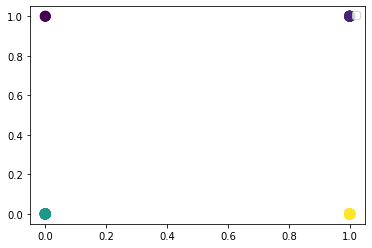

No handles with labels found to put in legend.


                           Logit Regression Results                           
Dep. Variable:               career_y   No. Observations:                  106
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Mar 2022   Pseudo R-squ.:                -0.05334
Time:                        23:04:07   Log-Likelihood:                -71.546
converged:                       True   LL-Null:                       -67.923
Covariance Type:            nonrobust   LLR p-value:                       nan
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
career_c_partners_y     1.3863      0.791      1.754      0.080      -0.163       2.936
2
106
Optimization terminated successfully.
         Current function value: 0.677516
         Iteration

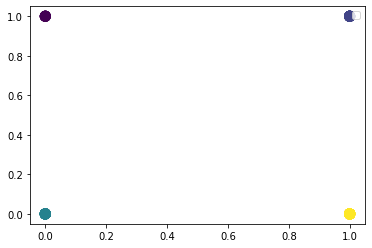

No handles with labels found to put in legend.


                           Logit Regression Results                           
Dep. Variable:               career_y   No. Observations:                  106
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Mar 2022   Pseudo R-squ.:                -0.05732
Time:                        23:04:08   Log-Likelihood:                -71.817
converged:                       True   LL-Null:                       -67.923
Covariance Type:            nonrobust   LLR p-value:                       nan
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
career_c_partners_y     0.7538      0.429      1.758      0.079      -0.087       1.594
3
106
Optimization terminated successfully.
         Current function value: 0.693147
         Iteration

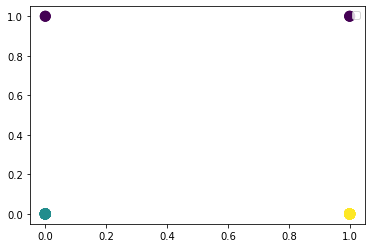

c:\users\lucy\documents\fiit_5semester\iau\env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
No handles with labels found to put in legend.


                           Logit Regression Results                           
Dep. Variable:               career_y   No. Observations:                  106
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Mar 2022   Pseudo R-squ.:                -0.08172
Time:                        23:04:08   Log-Likelihood:                -73.474
converged:                       True   LL-Null:                       -67.923
Covariance Type:            nonrobust   LLR p-value:                       nan
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
career_c_partners_y          0      1.000          0      1.000      -1.960       1.960
4
106
         Current function value: 0.673624
         Iterations: 35


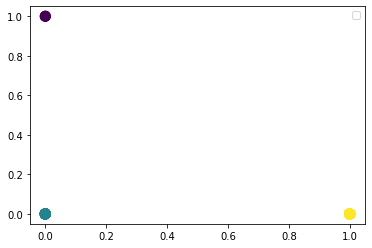

No handles with labels found to put in legend.


                           Logit Regression Results                           
Dep. Variable:               career_y   No. Observations:                  106
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Mar 2022   Pseudo R-squ.:                -0.05125
Time:                        23:04:08   Log-Likelihood:                -71.404
converged:                      False   LL-Null:                       -67.923
Covariance Type:            nonrobust   LLR p-value:                       nan
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
career_c_partners_y    -5.7057     10.043     -0.568      0.570     -25.389      13.978
5
106
Optimization terminated successfully.
         Current function value: 0.688339
         Iteration

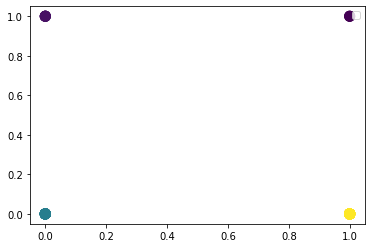

No handles with labels found to put in legend.


                           Logit Regression Results                           
Dep. Variable:               career_y   No. Observations:                  106
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Mar 2022   Pseudo R-squ.:                -0.07421
Time:                        23:04:09   Log-Likelihood:                -72.964
converged:                       True   LL-Null:                       -67.923
Covariance Type:            nonrobust   LLR p-value:                       nan
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
career_c_partners_y    -0.6931      0.707     -0.980      0.327      -2.079       0.693
6
106
Optimization terminated successfully.
         Current function value: 0.683275
         Iteration

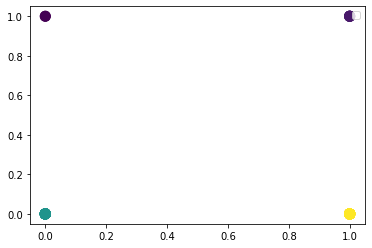

No handles with labels found to put in legend.


                           Logit Regression Results                           
Dep. Variable:               career_y   No. Observations:                  106
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Mar 2022   Pseudo R-squ.:                -0.06631
Time:                        23:04:09   Log-Likelihood:                -72.427
converged:                       True   LL-Null:                       -67.923
Covariance Type:            nonrobust   LLR p-value:                       nan
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
career_c_partners_y     1.0986      0.816      1.346      0.178      -0.502       2.699
7
106
Optimization terminated successfully.
         Current function value: 0.633997
         Iteration

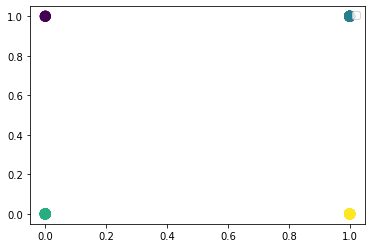

                           Logit Regression Results                           
Dep. Variable:               career_y   No. Observations:                  106
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Mar 2022   Pseudo R-squ.:                 0.01059
Time:                        23:04:09   Log-Likelihood:                -67.204
converged:                       True   LL-Null:                       -67.923
Covariance Type:            nonrobust   LLR p-value:                       nan
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
career_c_partners_y     1.5261      0.493      3.093      0.002       0.559       2.493
8
106
Optimization terminated successfully.
         Current function value: 0.693147
         Iteration

LinAlgError: Singular matrix

In [23]:
for i in range(1,10):
    print(i)
    calc_logit(df_match.copy(), 4,i)

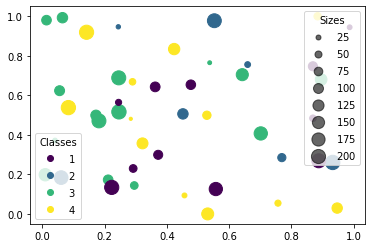

In [24]:
N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()